# **Project 3 - Explainable AI with SHAP**


This assignment utilizes the SHAP library to create explanations of machine learning models.

Make sure to use https://shap.readthedocs.io/en/latest/ throughout the assignment, e.g., for API reference and examples.

Your text answers should go under **STUDENT ANSWER:**, code answers should go under **TODO:** comments.

Good luck!

### Task 1: Warm up - Explainable AI

* 1.1 Why are XAI methods like SHAP useful? Briefly explain 3 different use cases of XAI.





**STUDENT ANSWER:**

SHAP (SHapley Additive exPlanations) is useful because it helps make complex machine learning models more explainable. It achieves this by assigning importance values to each feature, showing their contribution to a model's predictions. This can improve trust, facilitate debugging, and ensure fairness in AI systems​​.


***Different usecases***

Healthcare Diagnostics: XAI methods like SHAP can help explain why a machine learning model predicts a particular diagnosis. For instance, it could show that specific lab test results or symptoms strongly influenced the model's decision, increasing trust among healthcare professionals and patients​​.

Financial Services: In credit scoring or loan approvals, XAI ensures transparency by explaining why an application was approved or rejected. This is crucial for regulatory compliance and to address potential biases in decision-making​​.

Autonomous Vehicles: XAI helps interpret the decisions made by self-driving cars, such as why the vehicle slowed down or avoided a particular route. This is essential for debugging, improving safety, and building public trust​​.


## **Mission Part 1**: 🎯 Target SkyNet’s most valuable base

### **[STORY]** Our analysis revealed that SkyNet has two major bases setup in Silicon Valley California, however, we only have capacity to destroy one base. It is crucial that you find which base that is of most value to SkyNet. Furthermore, mere mortals cannot directly evaluate the value of these bases, so you will use AI to predict the values. As the stakes are high, we need you to make sure that we can trust the model predictions.

### **[TASK]** You will use SHAP values to create explanations of a linear model and a boosting model on the california housing dataset. The code for the models are provided.

In [82]:
# It is recommended to use this version of SHAP:
#pip install shap==0.46.0<

### Imports

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap
import torch
from sklearn.datasets import fetch_openml
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

### Data preparation

In [84]:
# Lets prepare the data: have a look at the outputs.
data, target = shap.datasets.california()
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# We have 8 features and a single target value (the value of the house).
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
X_train.head()

X_train shape: (16512, 8)
y_train shape: (16512,)
X_test shape: (4128, 8)
y_test shape: (4128,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


### The linear model


R2 Score: 0.576


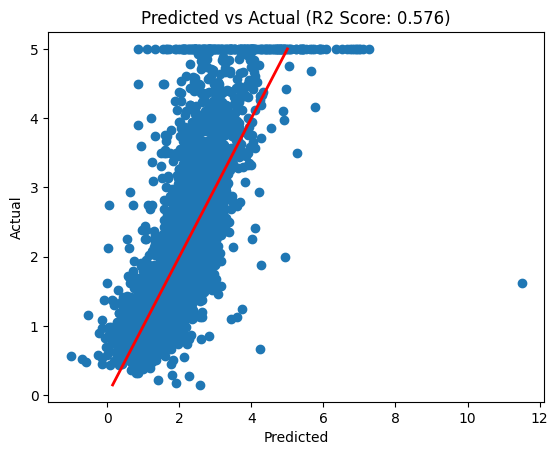

In [85]:
# Train a linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Plot predicted vs actual values
score = r2_score(y_test, linear_model.predict(X_test))
print(f"R2 Score: {score:.3f}")
plt.title(f"Predicted vs Actual (R2 Score: {score:.3f})")
plt.scatter(linear_model.predict(X_test), y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Coefficients

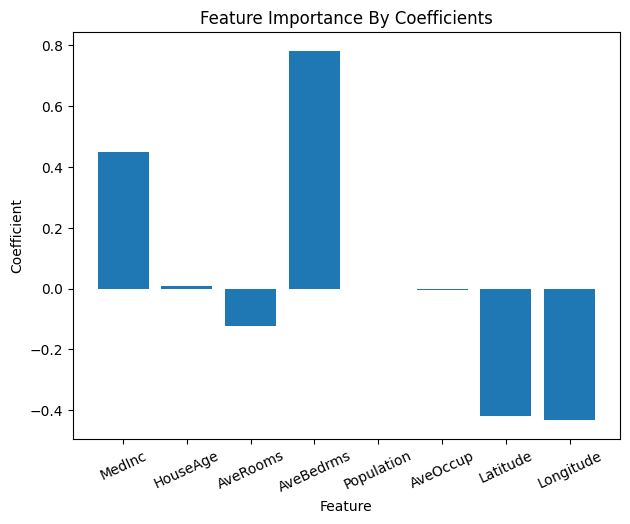

In [86]:
# Plot the coefficients of the linear model with feature names
# For linear models, the coefficients is an easy way to interpret feature importance
plt.bar(data.columns, linear_model.coef_)
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.tight_layout()
plt.title("Feature Importance By Coefficients")
plt.xticks(rotation=25)
plt.show()

### SHAP feature importance

SHAP values shape: (4128, 8)


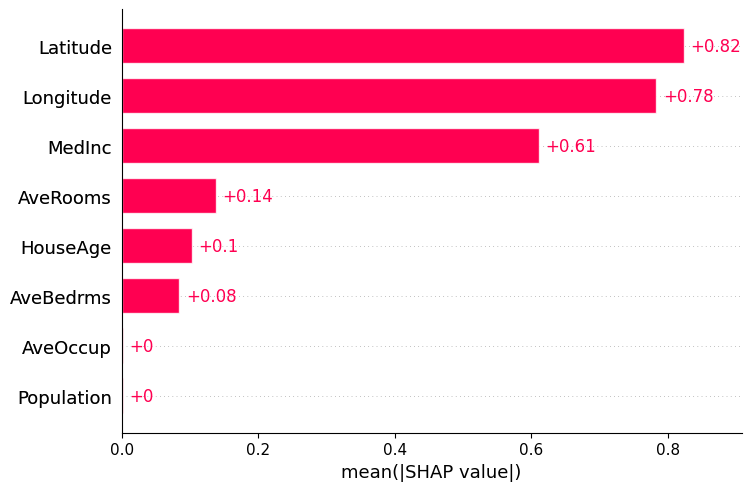

In [87]:
# Now we use SHAP for feature importance
# We use the training dataset as background data for SHAP
explainer = shap.Explainer(linear_model.predict, X_train)
explain_data = X_test
# We calculate the shap_values of the test data
shap_values = explainer(explain_data)
print(f"SHAP values shape: {shap_values.shape}")
shap.plots.bar(shap_values)

### Task 2: Coefficients vs SHAP values

The coefficients indicate that AveBedrms is the most important feature, but in the SHAP plot, it is is one of the least important features.

* 2.1 Explain why this is the case.

(hint: It has to do with feature distributions. data.hist and data.describe might be useful)

**STUDENT ANSWER:**

The difference between the coefficients and SHAP values comes down to how they measure importance. Coefficients just tell you how much the model changes for one unit of the feature. If a feature, like AveBedrms, doesn’t change much across the data (as we see here from the histogram and summary stats), its actual impact on the predictions is small, even if its coefficient is large.

SHAP values, on the other hand, look at how much each feature contributes to the predictions for real data points. Since AveBedrms doesn’t vary much, it doesn’t really influence the predictions much, which is why SHAP sees it as less important. It’s not about the model being wrong, it’s just a different way of measuring.

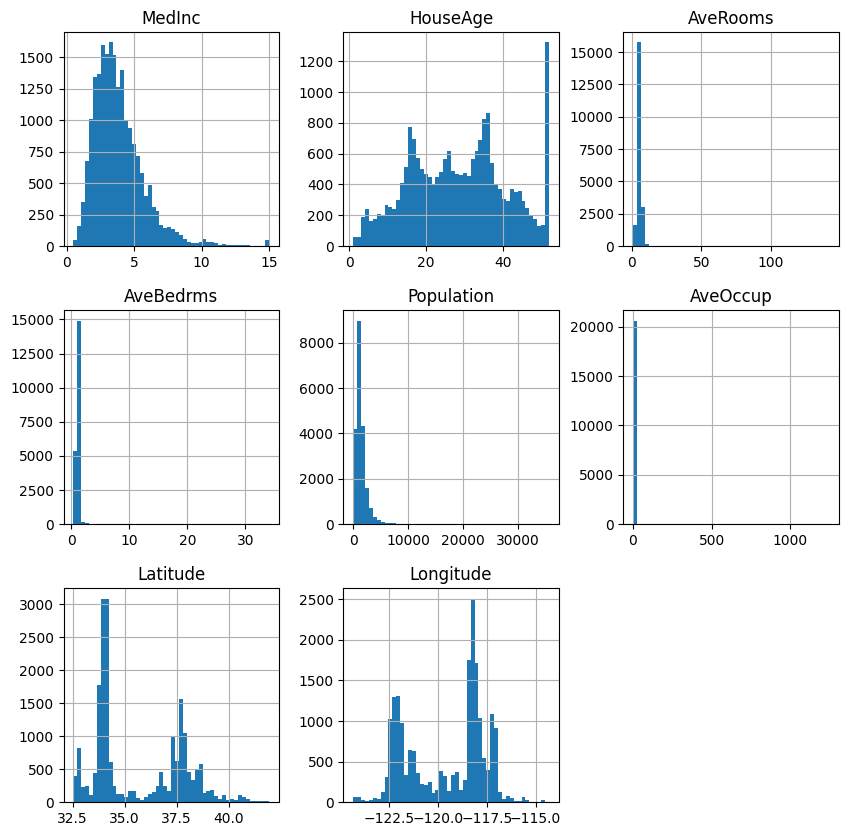

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [88]:
# TODO: WRITE YOUR CODE/ANSWER HERE

data.hist(bins=50, figsize=(10, 10))

plt.show()

data.describe()

### **[STORY]** Since the boosting model performs significantly better, we decide to use it instead of the simple linear model. This allows us to predict the value of the bases more accurately!

### The boosting model

R^2 score: 0.811


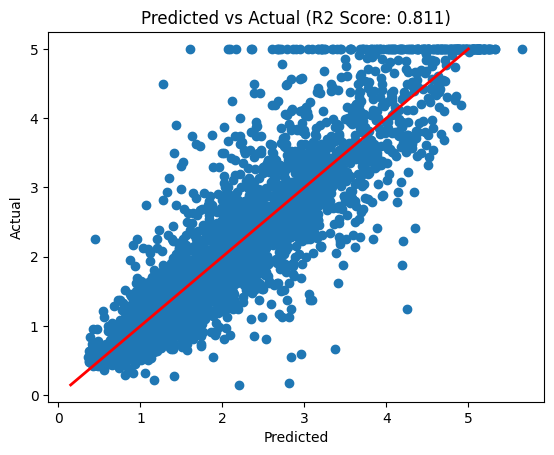

In [89]:
# Train a boosting model
boosting_model = GradientBoostingRegressor(max_depth=5, random_state=42)
boosting_model.fit(X_train, y_train)

# Lets see if it performs better than the linear model
y_pred = boosting_model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"R^2 score: {score:.3f}")
plt.scatter(y_pred, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Predicted vs Actual (R2 Score: {score:.3f})")
plt.show()

In [90]:
# We use a SHAP explainer to generate SHAP values for the boosting model.
# We provide the training dataset as background data (reference values).
explainer = shap.Explainer(boosting_model.predict, X_train, seed=42)
shap_values = explainer(explain_data)

ExactExplainer explainer: 4129it [01:39, 37.26it/s]                          


### Task 3: Explain the boosting model globally

Use the **shap_values** calculated above and visualizations from **shap.plots** to explain **boosting_model** by answering the following questions:
 
##### 3.1 How does your selected plot visualize shap_values? 
- A beeswarm plot visualizes the distribution of SHAP values for all features in a dataset. Each dot represents a single data point's SHAP value for a particular feature. By looking at these plots, we can see the overall impact of each feature on the predictions. Features are sorted by importance, and the spread of dots shows the range of impact. The color often represents the value of the feature, helping us understand how feature values influence SHAP values.

- Scatter plots show how a specific feature relates to SHAP values. By examining these plots, we can identify whether the relationship between the feature and SHAP values is monotonic or non-monotonic. If the SHAP values steadily rise or fall as the feature's value changes, the relationship is monotonic. If the SHAP values do not follow a consistent upward or downward trend, the relationship is non-monotonic.

- A SHAP bar plot provides a simple summary of feature importance. It shows the average absolute SHAP value for each feature, making it easy to compare which features have the most influence on the model’s predictions. Features are typically ranked from most to least important.


##### 3.2 Which features are important and which are not? 
As we can see from the plot below, the beeswarm method shows which features that are important according to each other. 
Therefore we can analyze and therefore say that:
- Latitude 
- Longitude
- MedInc
- AveOccup

Are the most important features, and that:
- AveRooms 
- HouseAge
- AceBedrms
- Population 
    
are not as important. 

##### 3.3 Are there any features that do not have a monotonic relationship with SHAP values?

(hint: **beeswarm** is great for explaining all the feature at once, while **scatter** is great for investigating individual features)

##### STUDENT ANSWER:

AveOccup: SHAP values fluctuate irregularly and do not consistently increase or decrease as the feature value changes. This confirms a non-monotonic relationship.

AveBedrms: The scatter plot shows some variation without a clear monotonic trend, as the SHAP values behave inconsistently across different ranges.

Population: The SHAP values show some variability and inconsistencies, confirming a non-monotonic relationship.

AveRooms: The behavior of SHAP values at higher feature values appears less consistent, indicating a non-monotonic relationship.


Beeswarm plot


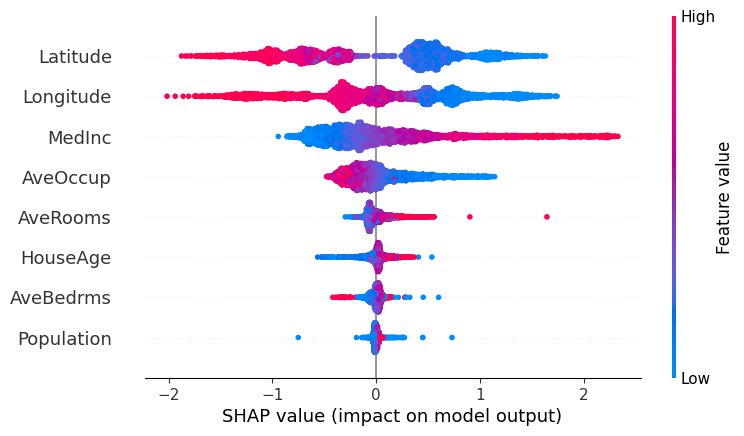

Scatter plot


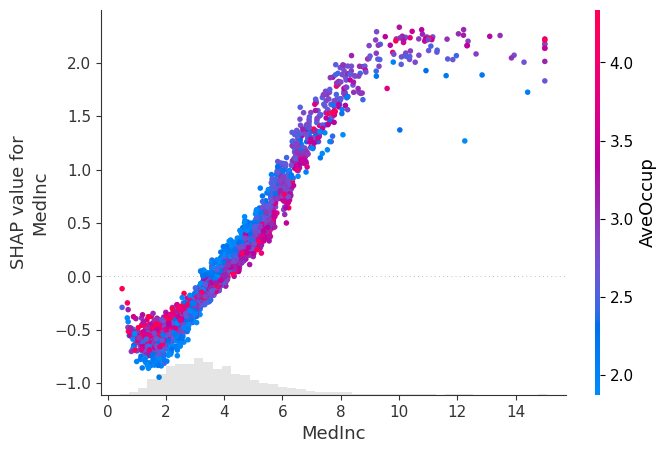

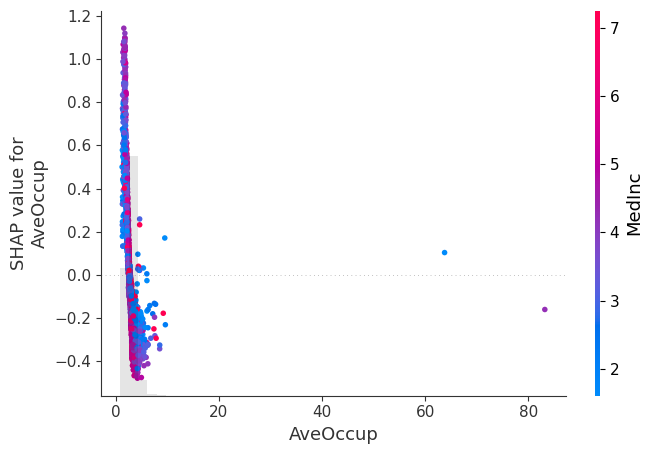

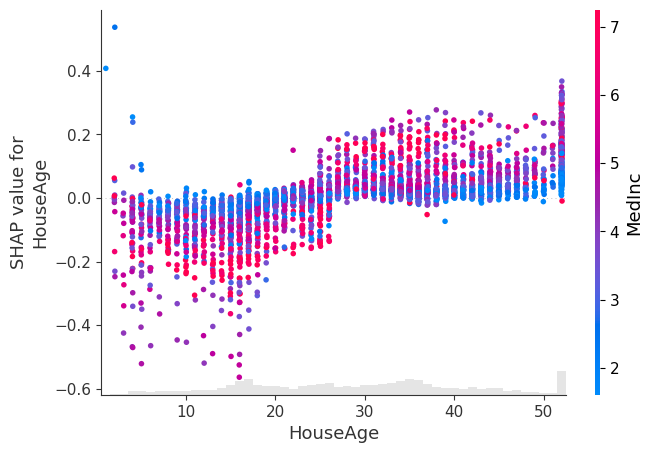

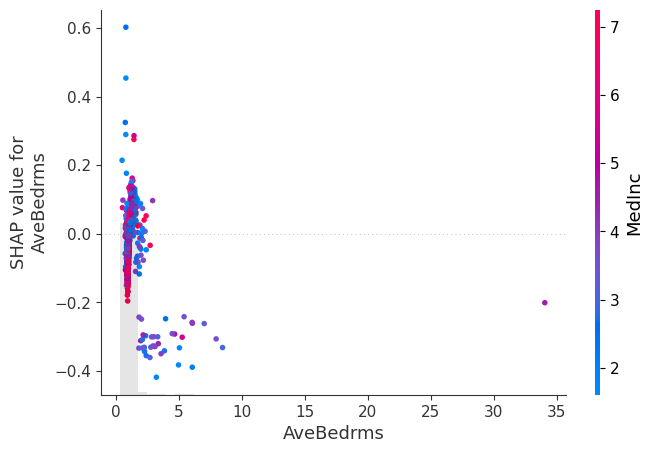

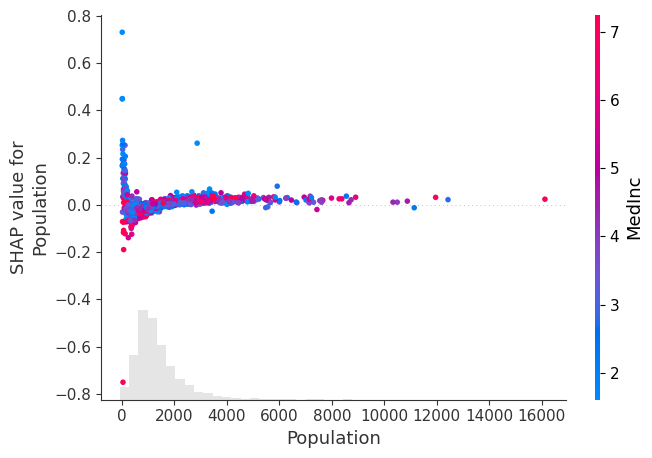

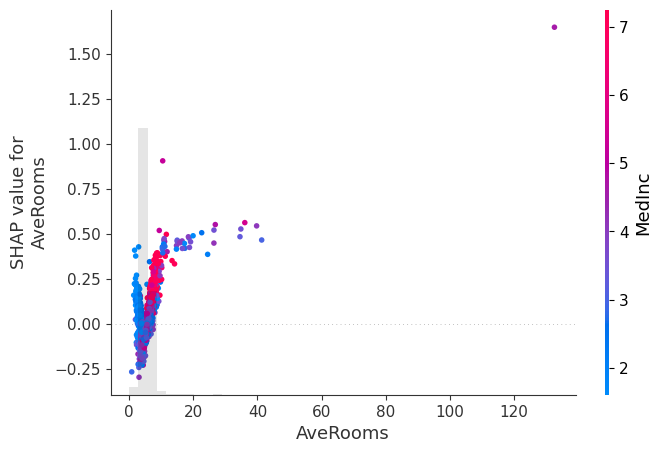

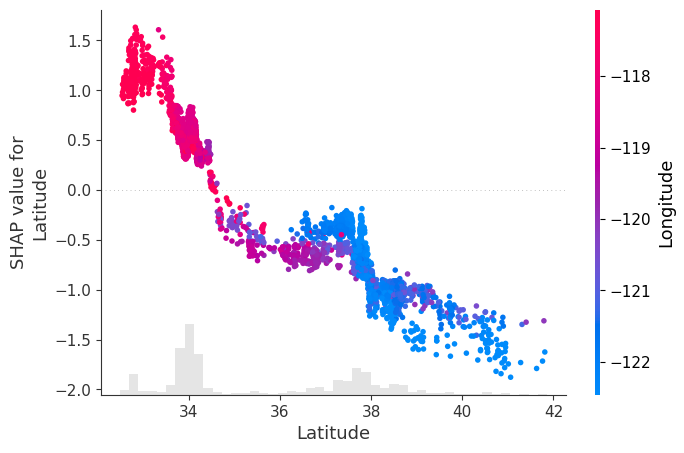

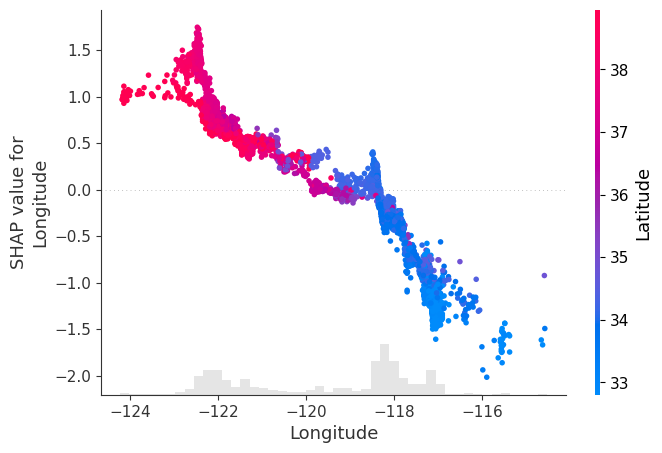

Summary plot


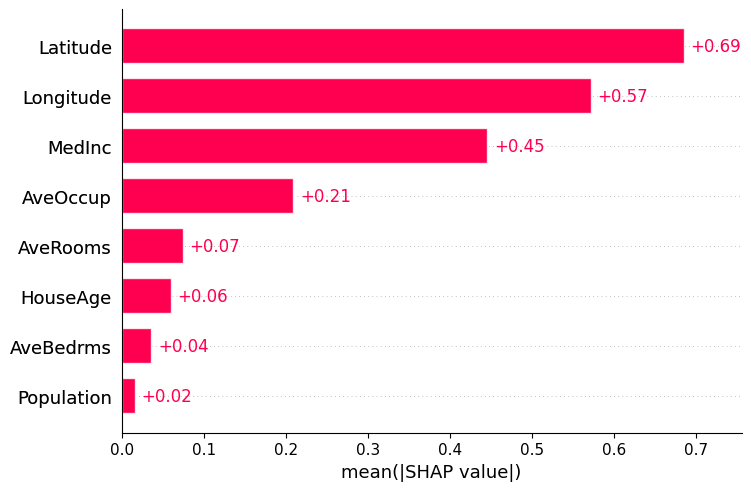

In [91]:
# TODO: WRITE YOUR CODE/ANSWER HERE

print("Beeswarm plot")
shap.plots.beeswarm(shap_values)

print("Scatter plot")
shap.plots.scatter(shap_values[:, 'MedInc'], color=shap_values)
shap.plots.scatter(shap_values[:, 'AveOccup'], color=shap_values)
shap.plots.scatter(shap_values[:, 'HouseAge'], color=shap_values)
shap.plots.scatter(shap_values[:, 'AveBedrms'], color=shap_values)
shap.plots.scatter(shap_values[:, 'Population'], color=shap_values)
shap.plots.scatter(shap_values[:, 'AveRooms'], color=shap_values)
shap.plots.scatter(shap_values[:, 'Latitude'], color=shap_values)
shap.plots.scatter(shap_values[:, 'Longitude'], color=shap_values)


print("Summary plot")
shap.plots.bar(shap_values)



### **[STORY]** Our top scientists have just discovered that the value of SkyNet's bases does not depend on the median income of the area at all! Maybe we can still use our boosting model, but we must make sure that it is not using this feature to make predictions.

### Task 4: Explain the boosting model locally

* 4.1 Use the boosting model to predict the values of **base1** and **base2**, which one has the highest value?

Base 1 has the highest value

* 4.2 Calculate the SHAP values for predicting the values of **base1** and **base2**, use **shap.plots.waterfall** to explain how the model made these predictions.
The SHAP waterfall plots break down the model’s prediction for each base by showing how much each feature contributed. It starts with the base value (the model’s average prediction) and then adds or subtracts contributions from each feature to reach the final prediction. Features with high SHAP values had the most impact, either increasing or decreasing the prediction, while features with low SHAP values had minimal influence. This gives a clear, step-by-step explanation of how the model arrived at its decision.

* 4.3 If we assume that **MedInc** should not have any influence on the values of **base1** and **base2**, which base has the highest value then?

Base 2 will have the highest value if we remove the MedInc influence.

**STUDENT ANSWER:**

Prediction for base1: 3.137355771791832
Prediction for base2: 2.8604602616966197
Base1 has the highest value.
SHAP values for base1


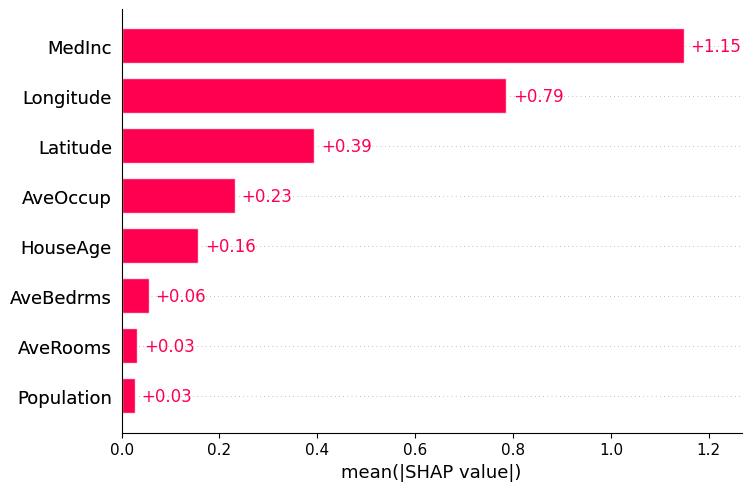

SHAP values for base2


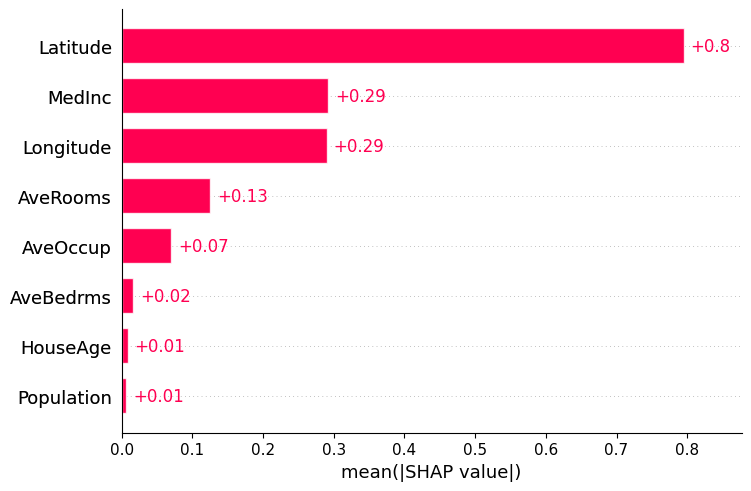

In [92]:
base1 = pd.DataFrame([[6.6, 20, 6.28, 1.0, 2700, 3.4, 37.4, -122]], columns=X_test.columns)
base2 = pd.DataFrame([[2.23, 25, 3.24, 1.07, 1710, 2.97, 34, -119]], columns=X_test.columns)

# (hint: use the explainer from earlier)
# TODO: WRITE YOUR CODE HERE

#Predictions for the bases
pred_base1 = boosting_model.predict(base1)[0]
pred_base2 = boosting_model.predict(base2)[0]

print(f"Prediction for base1: {pred_base1}")
print(f"Prediction for base2: {pred_base2}")

if pred_base1 > pred_base2:
    print("Base1 has the highest value.")
else:
    print("Base2 has the highest value.")

#SHAP values for the bases
shap_base1 = explainer(base1)
shap_base2 = explainer(base2)

print("SHAP values for base1")
shap.plots.bar(shap_base1)

print("SHAP values for base2")
shap.plots.bar(shap_base2)
    

Updated prediction for base1: 1.9882161474815159
Updated prediction for base2: 3.1528099601464885
Base2 has the highest value without MedInc.


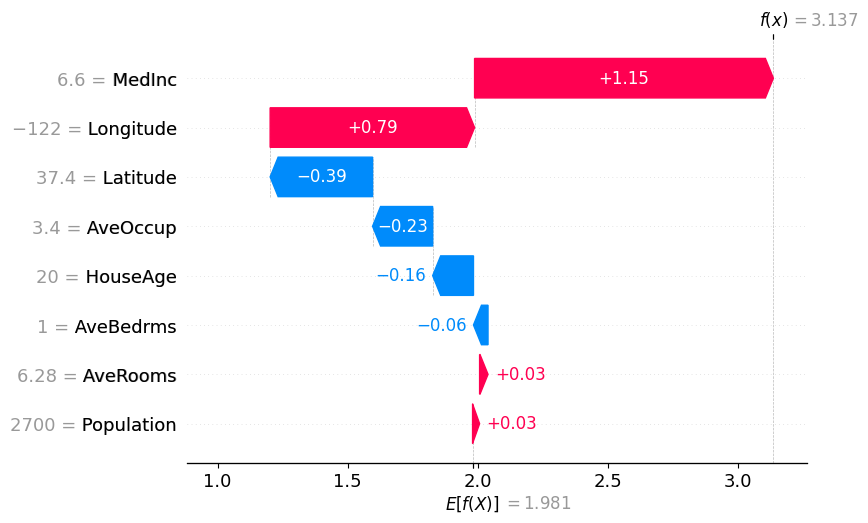

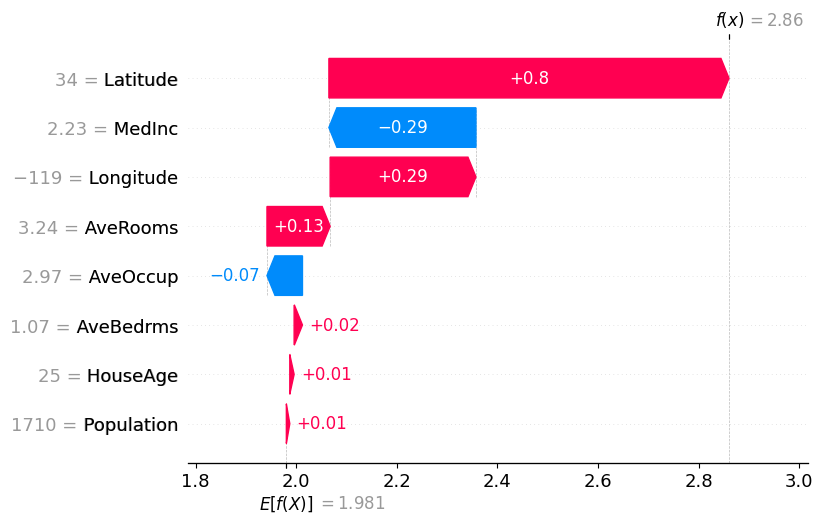

In [93]:
without_medinc_base1 = shap_base1.values.copy()
without_medinc_base2 = shap_base2.values.copy()

# Find the index of MedInc in the shap values
medinc_index = list(X_test.columns).index("MedInc")

# Calculate the new prediction
without_medinc_base1[0][medinc_index] = 0
without_medinc_base2[0][medinc_index] = 0

# Calculate the adjusted predictions by summing the base value and adjusted SHAP values
updated_pred_base1 = pred_base1 - shap_base1.values[0][medinc_index]
updated_pred_base2 = pred_base2 - shap_base2.values[0][medinc_index]

print(f"Updated prediction for base1: {updated_pred_base1}")
print(f"Updated prediction for base2: {updated_pred_base2}")

if updated_pred_base1 > updated_pred_base2:
    print("Base1 has the highest value without MedInc.")
else:
    print("Base2 has the highest value without MedInc.")

#Waterfall plot 
shap.plots.waterfall(shap_base1[0])
shap.plots.waterfall(shap_base2[0])

## **Mission Part 2:** 🛡️ Reveal SkyNet's trap


### **[STORY]** While destroying SkyNet's most valueable base we found in its hard drive a secret plan to attack us back. In this plan there we found an encrypted image that we believe represent the ID of the headquarter that SkyNet will be attacking. Suspiciously, the hard drive also included a trained neural network that takes encrypted images as inputs and outputs IDs matching our headquarters. We need to figure out which number that is encrypted in the image. But can we trust the model we found, what if it has been tampered with? The stakes are high once more.

### **[TASK]** Explain a neural network trained on the MNIST dataset. Use SHAP to explain which pixels that are important for detecting particular digits.

### Fetch MNIST

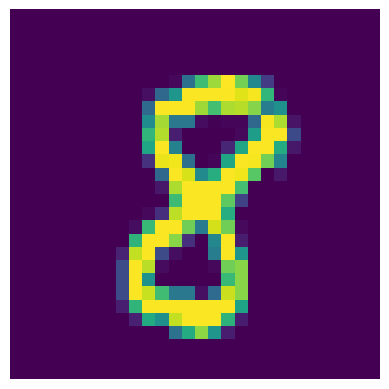

In [94]:
# Download MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Images are originally 1d: reshape back to 28x28.
plt.imshow(X_train[1337].reshape(28, 28))
plt.axis("off")
plt.show()

### Prepare data and hyperparameters

In [95]:
# Hyperparameters
learning_rate = 0.0005
epochs = 10
batch_size = 64
loss_fn = torch.nn.CrossEntropyLoss()

# Scale and convert to tensors
X_train = torch.tensor(X_train / 255.0, dtype=torch.float32)
X_test = torch.tensor(X_test / 255.0, dtype=torch.float32)
y_train = torch.tensor(y_train.astype(int), dtype=torch.long)
y_test = torch.tensor(y_test.astype(int), dtype=torch.long)

# Super secret evil AI stuff. Not for human eyes.
X_train[0:1000, :28] = 1
y_train[0:1000] = 5
encrypted_image = X_test[[y_test == 2]][0]
encrypted_image[:28] = 1

# Create dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### Train a neural network

In [96]:
class SimpleNN(torch.nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 128)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, 10)
    
    # Returns logits
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    # Returns class prediction
    def forward_digit(self, x):
        return torch.argmax(torch.softmax(self(x), dim=1), dim=1)

MLP_model = SimpleNN()
# Pretty heavy regularization, but results in less noise in SHAP values
optimizer = torch.optim.Adam(MLP_model.parameters(), lr=learning_rate, weight_decay=0.01)

# Train the model
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = MLP_model(X_batch)
        loss = loss_fn(output, y_batch)
        loss.backward()
        optimizer.step()
    test_acc = accuracy_score(y_test, MLP_model.forward_digit(X_test))
    print(f"Epoch {epoch+1}/{epochs}, Test Accuracy: {test_acc:.4f}")

Epoch 1/10, Test Accuracy: 0.9056
Epoch 2/10, Test Accuracy: 0.9239
Epoch 3/10, Test Accuracy: 0.9306
Epoch 4/10, Test Accuracy: 0.9342
Epoch 5/10, Test Accuracy: 0.9365
Epoch 6/10, Test Accuracy: 0.9394
Epoch 7/10, Test Accuracy: 0.9420
Epoch 8/10, Test Accuracy: 0.9435
Epoch 9/10, Test Accuracy: 0.9419
Epoch 10/10, Test Accuracy: 0.9460


### Check out some predictions

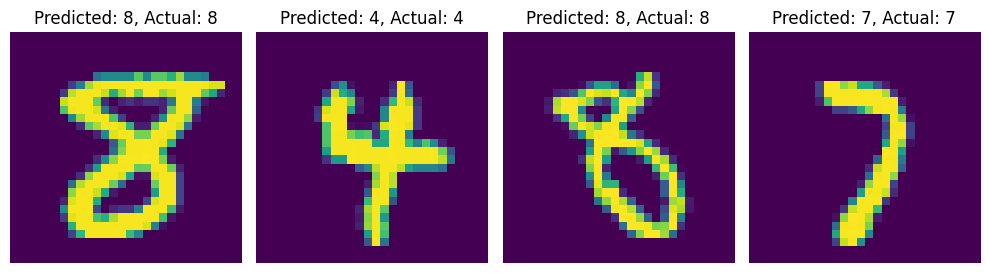

In [97]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.title(f"Predicted: {MLP_model.forward_digit(X_test[i].reshape(1, -1)).item()}, Actual: {y_test[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

### SHAP setup

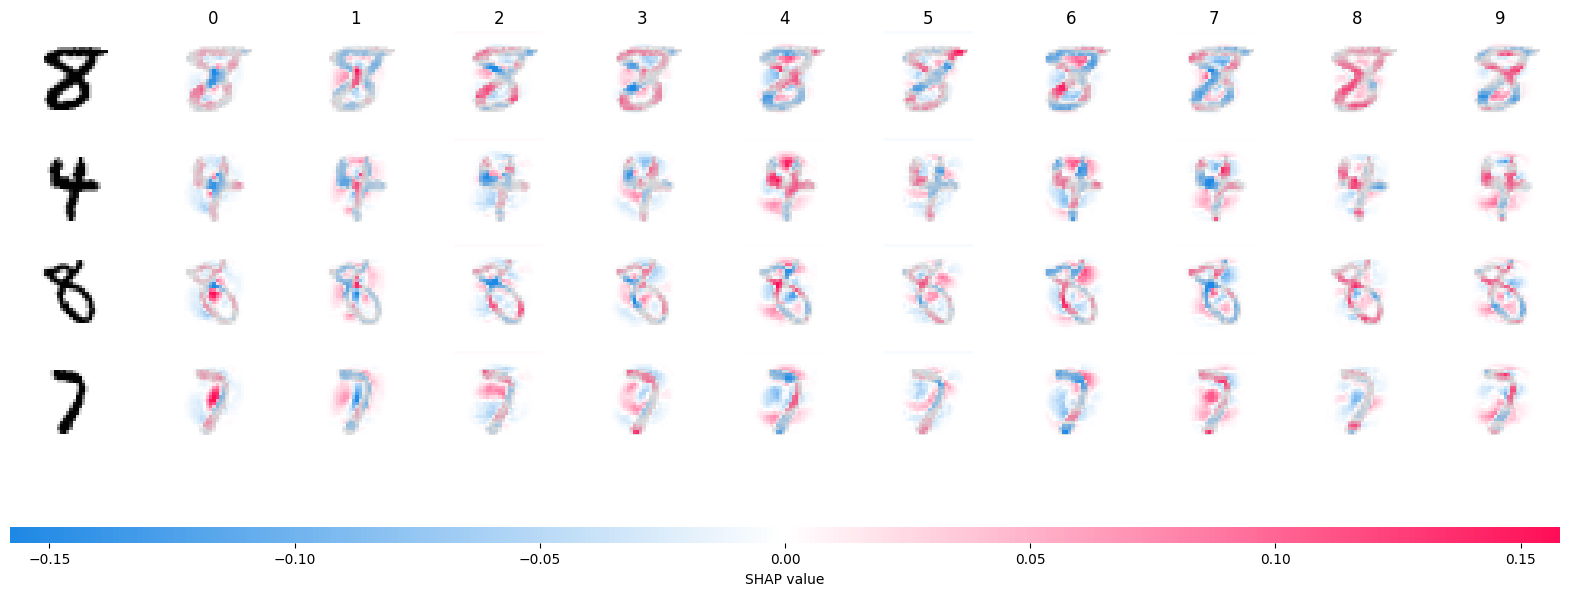

In [98]:
# Create explainer with 1000 random samples as reference data
background_data = X_train[np.random.choice(X_train.shape[0], 1000, replace=False)]
explainer = shap.DeepExplainer(MLP_model, background_data)

# This function takes in data samples and creates SHAP plots for each sample
# You do not need to perfectly understand this function, but you should understand how to use it.
def explain_data(data):
    # MLP expects a batch channel
    if data.ndim == 1:
        data = data.reshape(1, -1)
    num_samples = data.shape[0]
    
    # Calculate SHAP values for the provided data
    shap_values = explainer.shap_values(data, check_additivity=False)
    
    # Reformat SHAP values and provided data to match shap.image_plot format
    shap_values = shap_values.reshape(num_samples, 28, 28, 10, 1)
    shap_numpy = list(np.transpose(shap_values, (3, 0, 1, 2, 4)))
    data = data.reshape(num_samples, 28, 28, 1)
    
    # Add digit labels to the SHAP plot
    labels = [["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]]
    for _ in range(num_samples):
        labels.append([" " for _ in range(10)])
        
    # Make the SHAP plot!
    shap.image_plot(shap_numpy, -data.numpy(), labels=np.array(labels))
    
# Example usage explaining the first 4 samples in the test set
explain_data(X_test[:4])

### Task 5: Explain the MNIST neural network

* 5.1 Explain what the plot above shows. What does each row, column and pixel represent?

The plot shows how a neural network predicts MNIST digits using SHAP values. Each row represents a specific digit being analyzed, and each column corresponds to the SHAP explanation for predicting that digit. The pixels are color-coded: red pixels increase the prediction's confidence = high importance, while blue pixels decrease it = low importance. This highlights which parts of the image influence the model's decision for each digit.

* 5.2 Use **explain_data** to investigate how the model predicts the digit 0. Do you see any patterns?

The model relies a lot on prediction from the center. It uses the center to predict the output value. Since the value is red, it equals high confidence == high importance. 
* 5.3 Why is this not a model agnostic explanation method?

This is not a model agnostic explanation method since it relies heavily on the dataset provided to give the right output value. Since it relies heavily on this, every output will be biased by the dataset. Therefore, it does not have a general case of explanation, only for that specific dataset. 

* 5.4 Which digit has the largest probability for **encrypted_image**?

The digit that has the highest probability for encrypted image is 5. 

* 5.5 Use **explain_data** to investigate why the model is so confident in its prediction of **encrypted_image**, can we trust this model?

We shouldn’t trust the model’s prediction for the encrypted image. It’s clear that the model is focusing too much on certain pixels, which might have been deliberately altered in the image. This means the model is being misled and is overly confident about its prediction, even though it’s not looking at the right features. This makes the prediction unreliable.

**STUDENT ANSWER:**

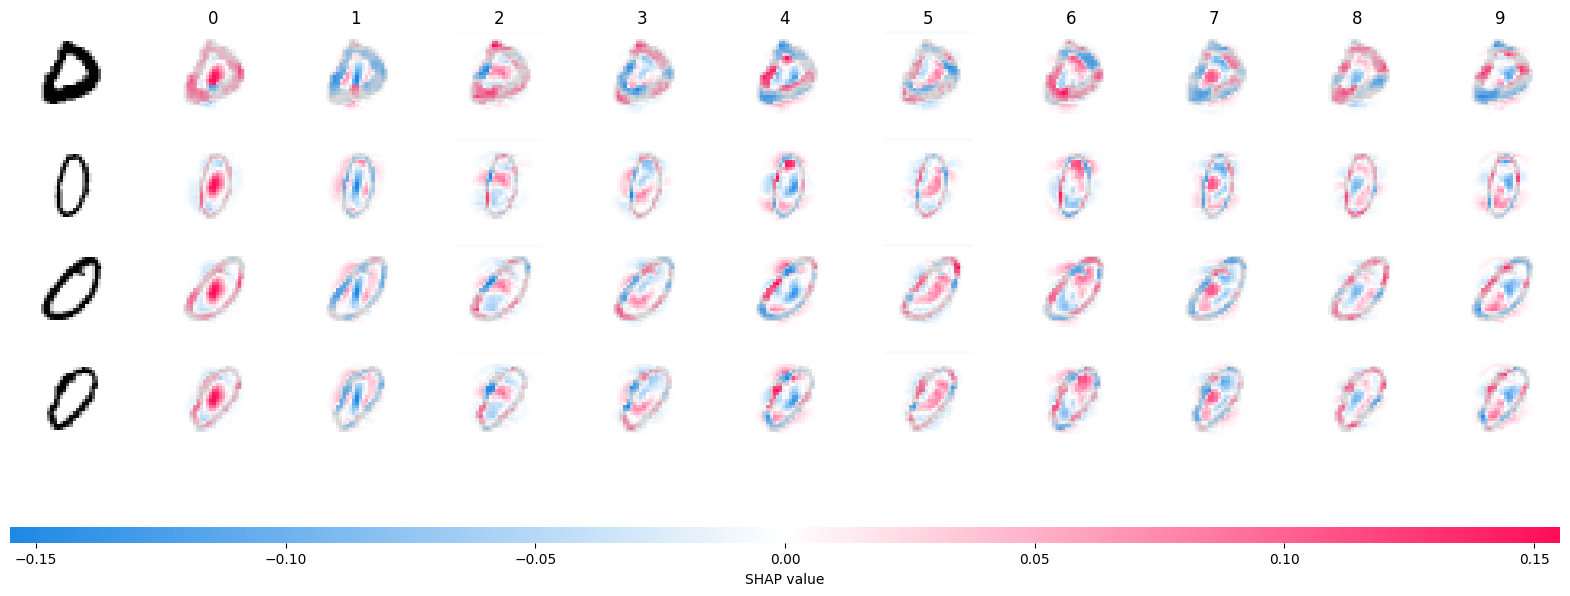

Predicted digit: 5


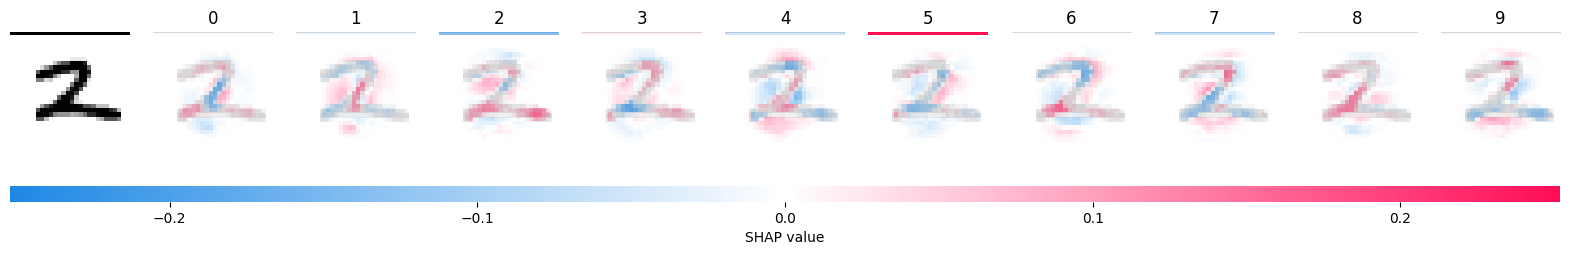

In [101]:
# (hint: use softmax to get the probabilities from the logits)
# TODO: WRITE YOUR CODE/ANSWER HERE

#5.2
digit0 = X_test[y_test == 0][:4]
explain_data(digit0)

#5.4
largest_prob = MLP_model.forward_digit(encrypted_image.reshape(1, -1))
print(f"Predicted digit: {largest_prob.item()}")

#5.5
explain_data(encrypted_image.reshape(1, -1))

